In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-whitegrid')


In [2]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey.head()

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse


In [3]:
## Extract risk data to its own dataframe

risk = survey.iloc[:, 10:130:2].fillna(50) ## All the actual questions, risk value
risk.head()

,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,Q15.2_1,Q16.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [4]:
## Rename columns for risk dataframe

risk.columns = [i for i in range(60)]
risk.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [5]:
## Extract waitlist decision data to its own dataframe

waitlist = survey.iloc[:, 11:130:2] ## All the actual questions, risk value
waitlist.head()

,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,Q15.3,Q16.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [6]:
## Rename waitlist decision columns to match the risk columns

waitlist.columns = [i for i in range(60)]
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


Text(0.5,0,'Risk Score')

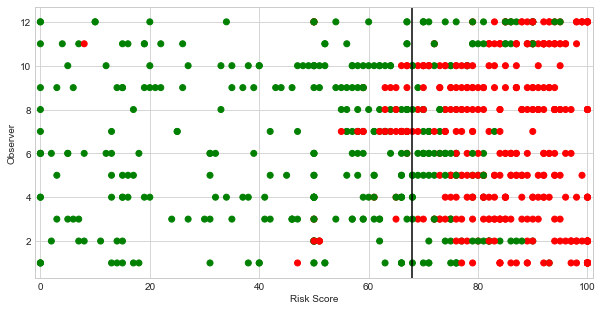

In [7]:
# All scenarios stacked into one chart, with a Mean of Means line thrown in
plt.rcParams['figure.figsize'] = [10, 5]
y = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

for question in range(60):
    x = risk[question]
    x_mean = risk[question].mean()
    plt.scatter(x, y, marker='o', color=colors[question])
plt.axvline(x=risk.mean().mean(), color='black')
plt.xlim(-1, 101)
plt.ylabel('Observer')
plt.xlabel('Risk Score')
# risk.mean().mean()

In [8]:
## Change Yes/No to green/red, for use in the graphs

waitlist[waitlist == 'Yes'] = 'green'
waitlist[waitlist == 'No'] = 'red'
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,green,red,green,green,red,green,red,green,green,red,...,red,green,red,red,red,green,red,green,green,red
1,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
2,green,red,green,green,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
3,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
4,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green


In [9]:
xl = pd.ExcelFile('Survey questions key.xlsx')
survey_key = xl.parse("Sheet1")
survey_key.max()

Scenario                    60.00
Output Q No                 67.00
SRTR Risk                   29.24
Age                          1.00
Diagnosis                    1.00
Blood Group                  1.00
BMI                          1.00
PVR                          1.00
Creat                        1.00
Bili                         1.00
Diab                         1.00
LVAD                         2.00
ECMO                         1.00
Vent                         1.00
Total No Of Risk Factors     5.00
dtype: float64

In [10]:

srtr_risk = pd.DataFrame(survey_key["SRTR Risk"])
scaler = MinMaxScaler(feature_range=(0,100))
scaled_srtr_risk = scaler.fit_transform(srtr_risk)
scaled_srtr_risk = pd.DataFrame(scaled_srtr_risk, columns=['Risk'])
scaled_srtr_risk.head()

,Risk
0,46.304263
1,88.893234
2,14.430974
3,1.329683
4,0.000000


In [11]:
## Calculate mean score per scenario

def calculateMeanScorePerScenario(risk_score, start_scenario=1, stop_scenario=60):
    mean_score = []
    n_observers, n_scenarios = risk_score.shape
    for scenario in range(n_scenarios):
        mean_score.append(risk_score.iloc[:, scenario].mean())
    return mean_score

average_risk_per_scenario = calculateMeanScorePerScenario(risk)
average_risk_per_scenario[0]

55.083333333333336

In [12]:
## Calculate mean score per provider

def calculateMeanScorePerObserver(risk_score):
    mean_score = []
    n_observers, n_scenarios = risk_score.shape
    for observer in range(n_observers):
        mean_score.append(risk_score.iloc[observer, :].mean())
    return mean_score

average_risk_per_observer = calculateMeanScorePerObserver(risk)
average_risk_per_observer[0]

70.88333333333334

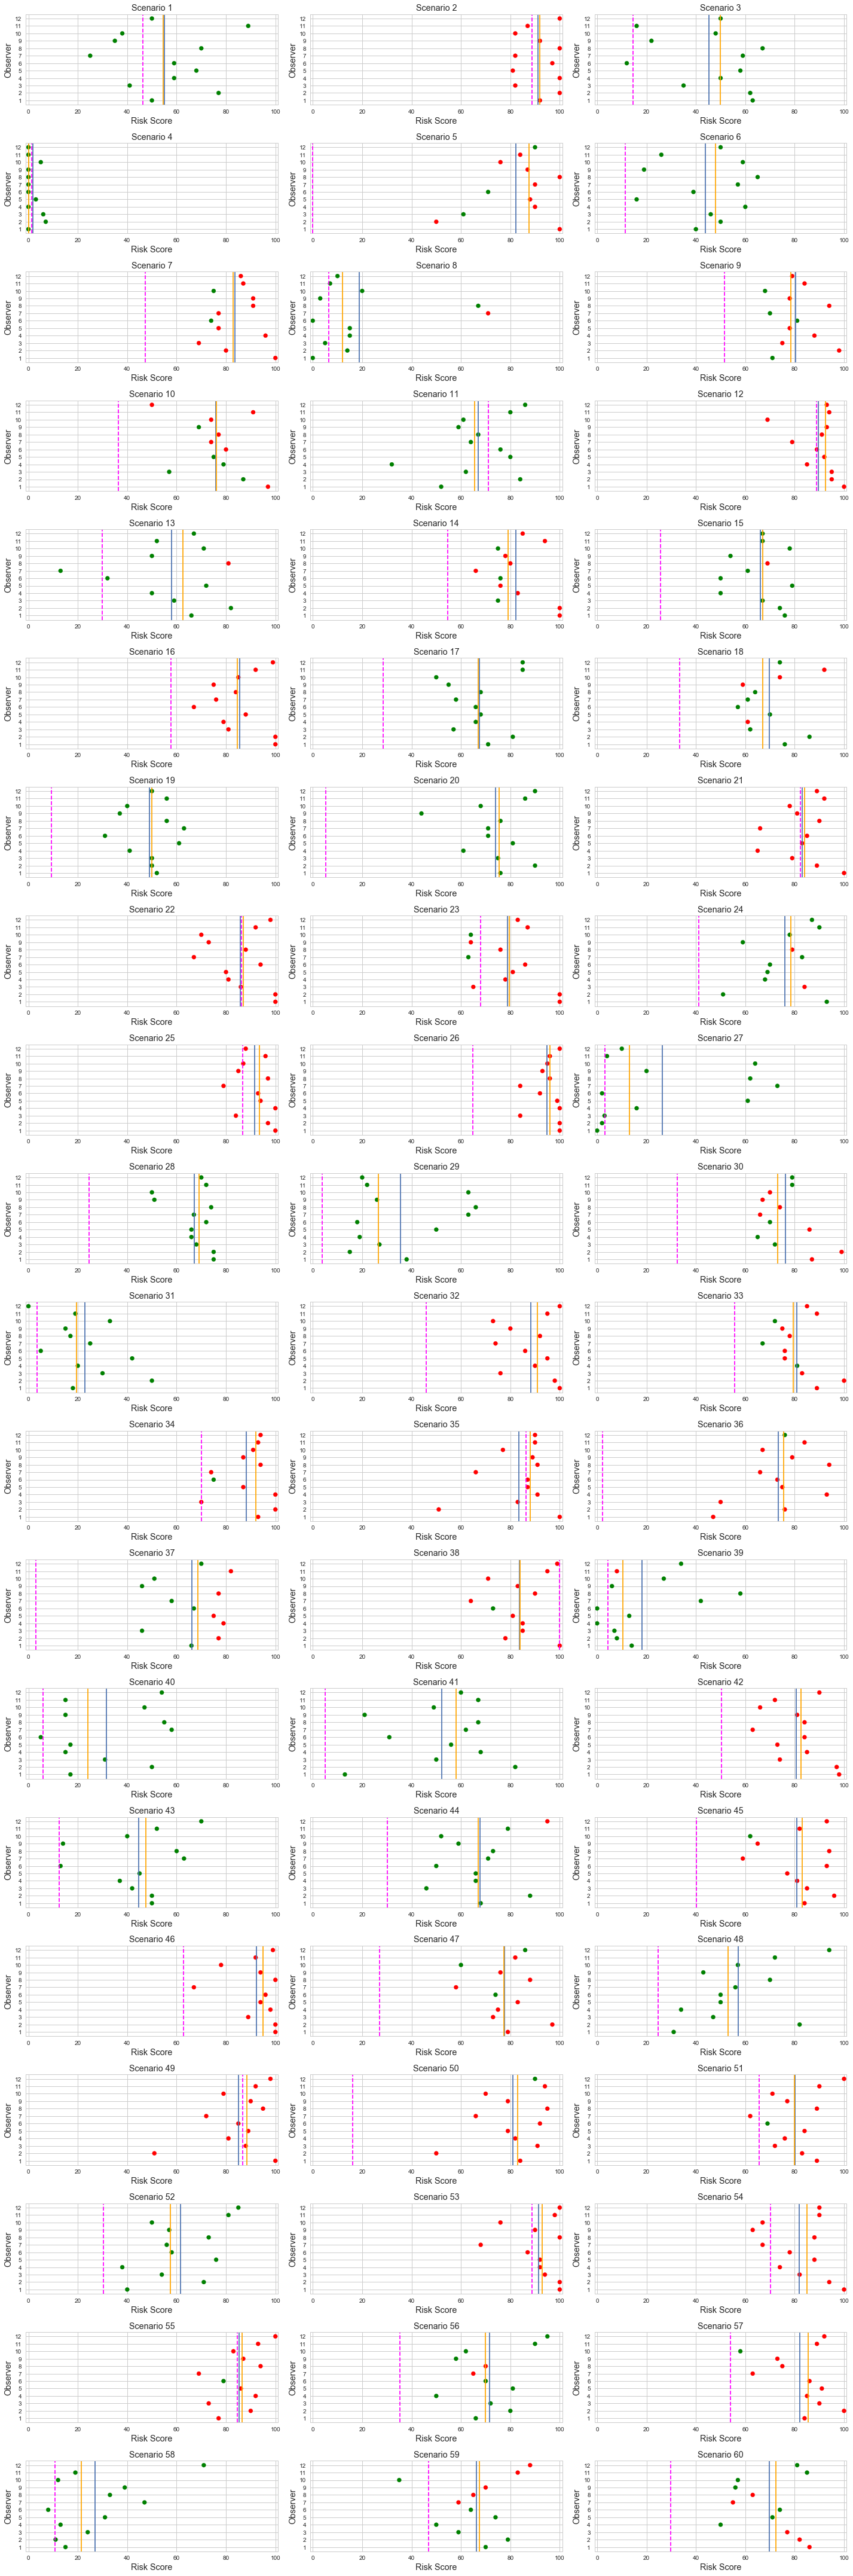

In [83]:
## Plot the results of each scenario plus their mean and median

def plotAllScenarios(risk, verdict, srtr):
    plt.rcParams['figure.figsize'] = [20, 60]
    fig, axs = plt.subplots(20, 3)
    observer = risk.index.values + 1
    colors = verdict
    colors[colors == 'Yes'] = 'green'
    colors[colors == 'No'] = 'red'
    question_number = 0
    for i in range(20):
        for j in range(3):
            axs[i, j].set_xlim([-1, 101])
            axs[i, j].scatter(risk[question_number], observer, color=colors[question_number])
            axs[i, j].axvline(x=risk[question_number].mean())
            axs[i, j].axvline(x=risk[question_number].median(), color='orange')
            axs[i, j].set_title(f'Scenario {question_number + 1}', fontsize='large')
            axs[i, j].set_ylabel('Observer', fontsize='large')
            axs[i, j].set_xlabel('Risk Score', fontsize='large')
            axs[i, j].axvline(srtr.iloc[question_number].values, color='magenta', linestyle='--')
            axs[i, j].set_yticks(risk.index.values+1)
            question_number += 1
    plt.tight_layout()
            
plotAllScenarios(risk, waitlist, scaled_srtr_risk)



In [81]:
risk.index.values+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [16]:
def calculateDeviationFromMeanByObserver(risk_scores, start_scenario=1, stop_scenario=60):
    """Calculates Mean Squared Error against the overall mean for that observer"""
    mse = []
    number_of_observers = len(risk_scores)
    for observer in range(number_of_observers):
        scores = risk_scores.iloc[observer, start_scenario-1:stop_scenario-1]
        scores_mean = scores.mean()
        n = len(scores)
        mse.append((1/n)*np.sum((scores - scores_mean)**2))
        # print(f'MSE, Observer {observer + 1}:\t{mse[observer]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')
    return mse
    
mse_noscore = calculateDeviationFromMeanByObserver(risk, 1, 30)
mse_withscore = calculateDeviationFromMeanByObserver(risk, 31, 60)

for i in range(len(mse_noscore)):
    print(f'Observer {i+1}:  Without score {mse_noscore[i]}, With score {mse_withscore[i]}')

Observer 1:  Without score 982.6896551724138, With score 941.8002378121284
Observer 2:  Without score 887.0273483947681, With score 630.3876337693222
Observer 3:  Without score 599.9310344827586, With score 518.3638525564803
Observer 4:  Without score 722.0975029726516, With score 790.5873959571936
Observer 5:  Without score 506.40665873959557, With score 485.9120095124852
Observer 6:  Without score 886.4827586206897, With score 854.6611177170034
Observer 7:  Without score 386.6468489892984, With score 97.26991676575506
Observer 8:  Without score 356.9726516052318, With score 376.29964328180733
Observer 9:  Without score 731.5505350772889, With score 682.3852556480381
Observer 10:  Without score 376.5588585017837, With score 317.6361474435197
Observer 11:  Without score 979.0535077288943, With score 673.0701545778835
Observer 12:  Without score 812.2116527942925, With score 483.8002378121282


In [53]:
def calculateDeviationFromSRTRByObserver(risk_scores, srtr, start_scenario=1, stop_scenario=60):
    """Calculates Mean Squared Error against each SRTR score for the observer"""
    mse = []
    number_of_observers = len(risk_scores)
    for observer in range(number_of_observers):
        scores = risk_scores.iloc[observer, start_scenario-1:stop_scenario-1]
        srtr_scores = srtr.iloc[start_scenario-1:stop_scenario-1, 0]
        scores_mean = scores.mean()
        n = len(scores)
        mse.append((1/n)*np.sum((scores - srtr_scores)**2))
        # print(f'MSE, Observer {observer + 1}:\t{mse[observer]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')
    return mse
    
mse_noscore = calculateDeviationFromSRTRByObserver(risk, scaled_srtr_risk, 1, 30)
mse_withscore = calculateDeviationFromSRTRByObserver(risk, scaled_srtr_risk, 31, 60)

for i in range(len(mse_noscore)):
    print(f'Observer {i+1}:  Without score {mse_noscore[i]}, With score {mse_withscore[i]}')

Observer 1:  Without score 1655.7849835056281, With score 1078.426530521952
Observer 2:  Without score 1448.6788650748163, With score 2005.7234301753708
Observer 3:  Without score 803.7917802636825, With score 891.5076735640406
Observer 4:  Without score 1114.9745779927023, With score 1252.0458176714942
Observer 5:  Without score 1383.3460936427769, With score 1328.199284152958
Observer 6:  Without score 755.8755799750901, With score 1035.1482275537644
Observer 7:  Without score 1499.0431659122742, With score 1061.1435480397868
Observer 8:  Without score 1837.0716340794418, With score 1843.8631682844161
Observer 9:  Without score 693.7337650788618, With score 811.0892279178767
Observer 10:  Without score 1221.2958192101848, With score 780.6830811672394
Observer 11:  Without score 1433.1201418943651, With score 1685.0290820033485
Observer 12:  Without score 1350.839263170645, With score 2166.9023305570145


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

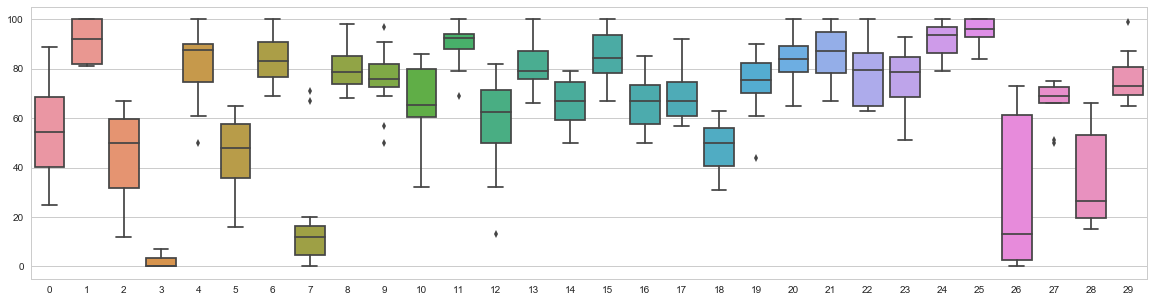

In [77]:
scores = risk.iloc[0, 0:30]  # Pandas Series from a DataFrame
srtr_scores = scaled_srtr_risk.iloc[0:30, 0]  # Pandas Series from a DataFrame
n = len(scores)
plt.figure(figsize=(20, 5))

ax = sns.boxplot(data=risk.iloc[:, 0:30])
ax.xlabel("Scenario")